In [1]:
from gensim.models import keyedvectors

In [2]:
model = keyedvectors.load_word2vec_format(
    "/Users/sagarguttal/Work/Natural-Language-Processing/models/GoogleNews-vectors-negative300.bin",
    binary=True
)

In [3]:
vocab = model.index_to_key
len(vocab)

3000000

In [7]:
def check_word_in_vocab(vacabulary:list, check_words:str):
    print("%40s %s"%("word", "Present"))
    print("%40s %s"%("------", "------"))
    for word in check_words:
        print("%40s %s"%(word, word in vacabulary))

        if not word.lower() == word:
            print("%40s %s"%(word.lower(), word.lower() in vacabulary))
    print(" "* 40)

In [8]:
list_of_words = ["Beds", "shirt", "MODI", "histo", "DONALD", "lowde"]
check_word_in_vocab(vocab, list_of_words)

                                    word Present
                                  ------ ------
                                    Beds True
                                    beds True
                                   shirt True
                                    MODI True
                                    modi True
                                   histo True
                                  DONALD True
                                  donald True
                                   lowde False
                                        


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

vector = model.get_vector("Bed") ## word to vec
vector.shape

(300,)

In [11]:
vector

array([-0.13085938, -0.31445312, -0.41796875,  0.13964844,  0.25585938,
       -0.04541016, -0.18164062,  0.03039551,  0.18457031,  0.00473022,
        0.1328125 ,  0.05712891,  0.15527344, -0.13867188, -0.10302734,
       -0.203125  ,  0.04101562, -0.00138092, -0.18261719,  0.49804688,
        0.06445312, -0.03564453, -0.09082031,  0.12060547, -0.41992188,
        0.16894531, -0.29296875,  0.09863281,  0.07958984, -0.16210938,
       -0.4609375 , -0.06738281, -0.08154297, -0.171875  , -0.171875  ,
        0.06445312, -0.08496094,  0.13183594, -0.14550781, -0.20410156,
       -0.11181641,  0.22558594, -0.14160156,  0.05151367, -0.15820312,
       -0.26367188, -0.06396484, -0.00567627,  0.07177734,  0.24804688,
       -0.06054688,  0.3359375 ,  0.1328125 ,  0.18457031, -0.01330566,
       -0.10009766,  0.00099182,  0.00588989,  0.00427246,  0.08642578,
       -0.01361084, -0.1640625 ,  0.07177734,  0.03417969,  0.35351562,
        0.08154297, -0.30078125, -0.05053711,  0.07226562,  0.07

/var/folders/l2/nfj0f8r522b5b238c2z_pwgr0000gn/T/ipykernel_37424/687947234.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(vector, kde=True)


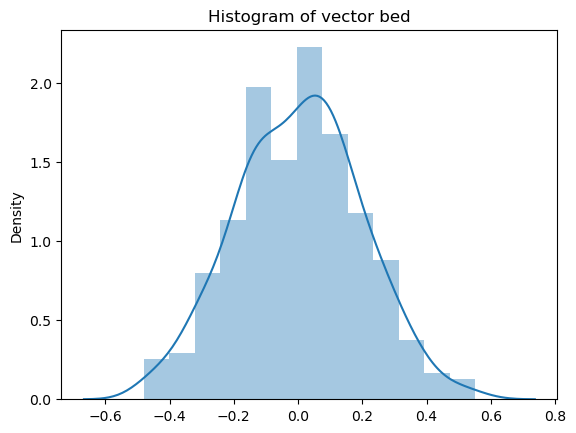

In [18]:
plt.title("Histogram of vector bed")
sns.distplot(vector, kde=True)
plt.show()

In [13]:
## Magnitude of vector
magnitude = np.linalg.norm(vector)
magnitude

3.3594854

In [20]:
### Similarity score for two given words
word_1 = "Bed"
word_2 = "Short"

cosin_similarity_score = model.similarity(word_1, word_2)
cosin_similarity_score

0.17379811

In [21]:
### Similarity score for two given words
word_1 = "Bike"
word_2 = "Car"

cosin_similarity_score = model.similarity(word_1, word_2)
cosin_similarity_score

0.50389147

In [24]:
### Similarity score for two given words
word_1 = "rain"
word_2 = "snow"

cosin_similarity_score = model.similarity(word_1, word_2)
cosin_similarity_score

0.6256516

In [26]:
### Similarity score for two given words
word_1 = "sea"
word_2 = "ocean"

cosin_similarity_score = model.similarity(word_1, word_2)
cosin_similarity_score

0.76435417

In [27]:
### Most similar words
word = "Ocean"

results = model.most_similar(positive=word, topn=10)
print(results)

[('Atlantic', 0.5663149952888489), ('Neptune', 0.5561164617538452), ('Sea_Isle', 0.5489414930343628), ('Surf', 0.5288525819778442), ('Cape', 0.5218675136566162), ('Wildwood_Crest', 0.5192969441413879), ('Jersey', 0.5182872414588928), ('Brigantine', 0.517289936542511), ('ocean', 0.5171547532081604), ('Inc_OPTT', 0.5164828896522522)]


## How ro calculate similarity score for two given words


#### cos(x,y) = x.y / mag(x) * mag(y)

In [28]:
### Similarity score for two given words
word_1 = "sea"
word_2 = "ocean"

matrix = model.vectors
matrix.shape

(3000000, 300)

In [30]:
w1 = model.key_to_index[word_1]
w2 = model.key_to_index[word_2]
w1, w2

(2854, 5738)

In [31]:
v1 = matrix[w1]
v2 = matrix[w2]
v1

array([-0.06201172,  0.12792969, -0.01190186,  0.05786133,  0.06494141,
       -0.10839844, -0.17773438, -0.0480957 ,  0.16210938,  0.16601562,
        0.10791016, -0.1796875 , -0.19042969, -0.26367188, -0.35546875,
       -0.04150391, -0.10009766,  0.10205078, -0.02954102, -0.15234375,
       -0.07568359, -0.28320312, -0.01574707, -0.32226562,  0.18652344,
       -0.34765625, -0.11083984,  0.15429688,  0.23730469, -0.28320312,
       -0.09375   ,  0.14550781, -0.08740234,  0.08984375, -0.09277344,
       -0.12353516, -0.0612793 , -0.11035156, -0.01708984, -0.20214844,
        0.01031494, -0.03417969, -0.00460815, -0.01470947, -0.08203125,
       -0.23339844, -0.21875   ,  0.06494141,  0.05151367, -0.02490234,
        0.04858398,  0.27148438,  0.15820312,  0.0177002 , -0.20898438,
       -0.03857422, -0.02294922,  0.05737305,  0.23339844,  0.02416992,
       -0.28125   , -0.0612793 ,  0.02709961, -0.02856445,  0.36132812,
        0.05029297, -0.18847656, -0.03686523, -0.12207031, -0.15

In [32]:
cos_sim = (np.dot(v1,v2))/(np.linalg.norm(v1)*np.linalg.norm(v2))
cos_sim

0.76435417

In [33]:
### Similarity score for two given words
word_1 = "sea"
word_2 = "ocean"

cosin_similarity_score = model.similarity(word_1, word_2)
cosin_similarity_score

0.76435417